In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
#ip <- installed.packages() 
#pkgs.to.remove <- ip[!(ip[,"Priority"] %in% c("base", "recommended")), 1]
#sapply(pkgs.to.remove, remove.packages)

NULL


In [3]:
%%R
#source("http://bioconductor.org/biocLite.R")

NULL


In [4]:
%%R
#biocLite("phyloseq")

NULL


In [5]:
%%R
#source("http://bioconductor.org/biocLite.R")
#biocLite("phyloseq")

NULL


In [25]:
%%R
library("phyloseq")

In [7]:
%%R
library(ggplot2)

In [190]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", "../../SeqData/trees/fulltree.tre", parseFunction = parse_taxonomy_greengenes)
physeq = prune_samples((sample_data(physeq)$Buff==0|sample_data(physeq)$Trtmt=="H"),physeq)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4857 taxa and 76 samples ]
sample_data() Sample Data:       [ 76 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 4857 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4857 tips and 4855 internal nodes ]


In [184]:
%%R
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4857 taxa and 102 samples ]
sample_data() Sample Data:       [ 102 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 4857 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4857 tips and 4855 internal nodes ]


In [191]:
%%R
ps.b = subset_taxa(physeq,Kingdom=="Bacteria")
ps.b = subset_samples(ps.b,sample_sums(physeq)>2000)

In [192]:
%%R
physeq.noK <- subset_samples(physeq,Trtmt!="K")

In [193]:
%%R
physeq.noSmall<-subset_samples(physeq,sample_sums(physeq)>5000)

In [194]:
%%R
physeq.noSmall.FQ <- subset_samples(physeq,sample_sums(physeq)>1000)
physeq.noSmall.FQ <- subset_samples(physeq.noSmall.FQ,Trtmt==c("Q","F"))

In [195]:
%%R
ps.no2 <- subset_samples(physeq,Month!=2)

In [196]:
%%R
ps <- physeq.noSmall

In [197]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(ps, function(x) x / sum(x))

In [198]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.NMDS.full = ordinate(ps_snorm, method = "NMDS", distance = "unifrac", weighted=TRUE)
NMDS.full = plot_ordination(ps_snorm, ord.NMDS.full, axes = c(1,2), justDF = TRUE)
NMDS.full$Samples = rownames(NMDS.full)

Run 0 stress 0.1264864 
Run 1 stress 0.1268468 
... procrustes: rmse 0.009435441  max resid 0.06093807 
Run 2 stress 0.1542965 
Run 3 stress 0.129799 
Run 4 stress 0.1610073 
Run 5 stress 0.1726158 
Run 6 stress 0.1601716 
Run 7 stress 0.1295669 
Run 8 stress 0.1516801 
Run 9 stress 0.152619 
Run 10 stress 0.148727 
Run 11 stress 0.163023 
Run 12 stress 0.1298232 
Run 13 stress 0.1383675 
Run 14 stress 0.1651789 
Run 15 stress 0.1554167 
Run 16 stress 0.1422691 
Run 17 stress 0.1295755 
Run 18 stress 0.1627269 
Run 19 stress 0.1349451 
Run 20 stress 0.1564283 


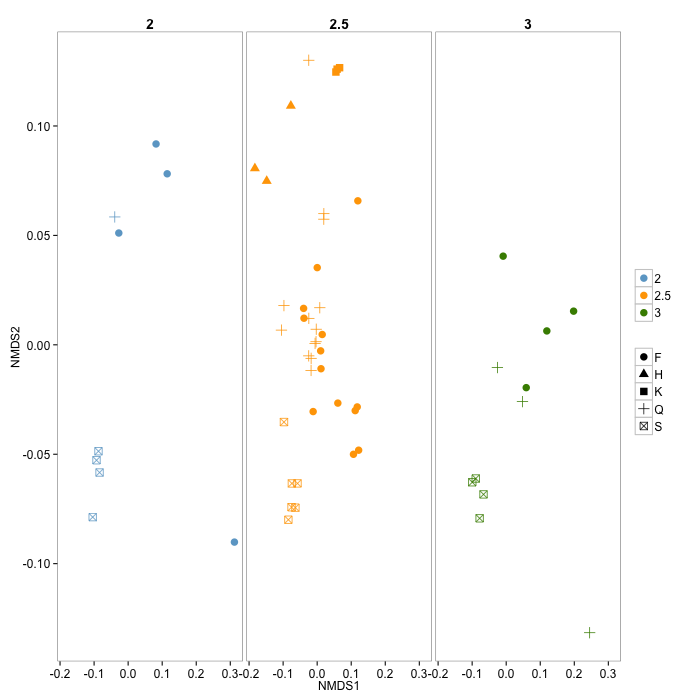

In [199]:
%%R -h 700 -w 700
D <- NMDS.full
# Sets the relevant ordination

#D$Trtmt <- as.factor(D$Trtmt)
#levels(D$Trtmt) <- c("Ferrihydrite", "Heavy Fraction", "Kaolinite", "Quartz", "Soil")

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

#D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
#D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
#D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = Month, shape = Trtmt))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","orange","chartreuse4","gold1","red3","black"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),axis.text = element_text(size=12),legend.text = element_text(size=12),
          strip.background = element_rect(colour="white", fill="white"))

# Displays the plot object
#p = p + facet_wrap(~Month, scales="free", ncol=1)
# The axis scales could be all optimized individually
p = p + facet_grid(~Month)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

I need to calculate similarity distances between all units and see if the values are closer for related microcosms.  
Need to figure out how to test this